Este ejemplo trata sobre la clasificacion de clientes si compró o no en una tienda en linea, usando regresion logistica sobre un dataset  que contiene la informacion de los clientes como genero edad y salario

Primero importamos las librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importamos el dataset

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


Division del conjunto de datos en datos de entrenamiento y datos de prueba

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

dado el valor de la edad y el salario realizamos un ajuste de ezcalas con la clase standarScarler 

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)


creamos el modelo con la clase LogisticRegression de la librería sklearn y lo entrenamos con los datos del conjunto de entrenamiento X_train.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediccion de conjunto de pruebas

In [ ]:
y_pred = classifier.predict(X_test)

Matriz de Confusion para analizar tanto los falsos positivos, como los falsos negativos, esto por que su eficiencia no es completa.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[65  3]
 [ 8 24]]


Graficamos el conjunto de pruebas para poder observar mejor ambas regiones 0 y 1 donde los puntos rojos que estan en la zona verde y los puntos verdes en la zona roja son los elementos que nos da la matriz de confusion.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


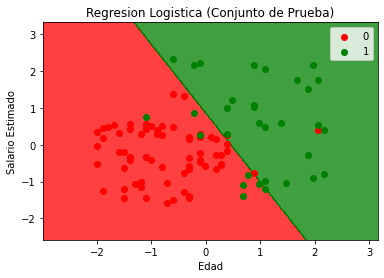

In [ ]:
# Visualizacion de los resultados de Prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

por ultimo calculamos la eficiencia que nos da el 89%

In [ ]:
#la precisión del modelo la obtenemos con el score
score_test =classifier.score(X_test, y_test)

print(score_test)

0.89
